<a href="https://colab.research.google.com/github/francisrod01/ML_speech_to_text/blob/main/ML_speech_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speech recognition
Transform speech into text using a Python library.

In [4]:
# Upgrade pip to fix needed dependencies
! pip3 install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# installing speech_recognition
! pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
! pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
! pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
! pip install pyjokes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
! apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
! pip install PyAudio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libportaudio2 is already the newest version (19.6.0-1).
libportaudiocpp0 is already the newest version (19.6.0-1).
portaudio19-dev is already the newest version (19.6.0-1).
libasound2-dev is already the newest version (1.1.3-5ubuntu0.6).
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# ! pip install pygame

In [12]:
! pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
#import section
import speech_recognition as sr
from gtts import gTTS
import os
from datetime import datetime
# import playsound
import pyjokes
import wikipedia
import pyaudio
import webbrowser
# import winshell
# from pygame import mixer

In [14]:
# all imports
!pip -q install pydub
from pydub import AudioSegment

from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream);
  recorder.mimeType = 'audio/wav';
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  return b #byte stream
  # audio = AudioSegment.from_file(BytesIO(b))
  # return audio

In [15]:
import ipywidgets as widgets
from IPython import display as disp
from IPython.display import display, Audio, clear_output
from google.colab import output
import base64
from pydub import AudioSegment
import io
import tempfile
import librosa
import time

In [16]:
#
# original code: https://github.com/magenta/ddsp/blob/master/ddsp/colab/colab_utils.py
#


# Copyright 2020 The DDSP Authors.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

def record_audio(seconds=3,
                 sample_rate=44100,
                 normalize_db=0.1):
    """Record audio from the browser in colab using javascript.
    Based on: https://gist.github.com/korakot/c21c3476c024ad6d56d5f48b0bca92be
    Args:
      seconds: Number of seconds to record.
      sample_rate: Resample recorded audio to this sample rate.
      normalize_db: Normalize the audio to this many decibels. Set to None to skip
        normalization step.
    Returns:
      An array of the recorded audio at sample_rate.
    """
    # Use Javascript to record audio.
    record_js_code = """
      const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
      const b2text = blob => new Promise(resolve => {
        const reader = new FileReader()
        reader.onloadend = e => resolve(e.srcElement.result)
        reader.readAsDataURL(blob)
      })
      var record = time => new Promise(async resolve => {
        stream = await navigator.mediaDevices.getUserMedia({ audio: true })
        recorder = new MediaRecorder(stream);
        recorder.mimeType = 'audio/wav';
        chunks = []
        recorder.ondataavailable = e => chunks.push(e.data)
        recorder.start()
        await sleep(time)
        recorder.onstop = async ()=>{
          blob = new Blob(chunks)
          text = await b2text(blob)
          resolve(text)
        }
        recorder.stop()
      })
      """
    print('Starting recording for {} seconds...'.format(seconds))
    display(disp.Javascript(record_js_code))
    audio_string = output.eval_js('record(%d)' % (seconds * 1000.0))
    print('Finished recording!')
    audio_bytes = base64.b64decode(audio_string.split(',')[1])

    # fname = '/content/audio_recorded.wav'
    # with open(fname,'wb') as f:
    #   f.write(audio_bytes)
    # return 'audio.wav'  # or webm ?
    
    return audio_bytes_to_np(audio_bytes,
                             sample_rate=sample_rate,
                             normalize_db=normalize_db)


def audio_bytes_to_np(wav_data,
                      sample_rate=44100,
                      normalize_db=0.1):
    """Convert audio file data (in bytes) into a numpy array.
    Saves to a tempfile and loads with librosa.
    Args:
      wav_data: A byte stream of audio data.
      sample_rate: Resample recorded audio to this sample rate.
      normalize_db: Normalize the audio to this many decibels. Set to None to skip
        normalization step.
    Returns:
      An array of the recorded audio at sample_rate.
    """
    # Parse and normalize the audio.
    audio = AudioSegment.from_file(io.BytesIO(wav_data))
    audio.remove_dc_offset()
    if normalize_db is not None:
        audio.normalize(headroom=normalize_db)
    # Save to tempfile and load with librosa.
    with tempfile.NamedTemporaryFile(suffix='.wav') as temp_wav_file:
        # fname = temp_wav_file.name
        fname = '/content/audio_recorded.wav'
        audio.export(fname, format='wav')
        audio_np, unused_sr = librosa.load(fname, sr=sample_rate)
    return audio_np

In [17]:
#@title Testing Record
#@markdown * Set recording time:

SAMPLE_RATE = 44100
record_seconds =   3#@param {type:"number", min:1, max:10, step:1}

def _record_audio(b):
  global audio
  audio = record_audio(record_seconds, sample_rate=SAMPLE_RATE)
  clear_output()
  display(Audio(audio, rate=SAMPLE_RATE))

button = widgets.Button(description="Start recording...")
button.on_click(_record_audio)
display(button)

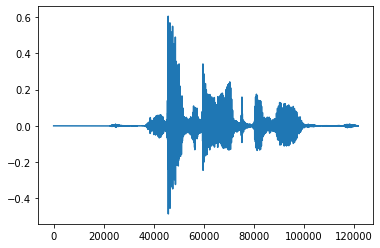

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(audio)

## Demo speech recognition

In [58]:
#get mic audio
def get_audio():
    r = sr.Recognizer()
    
    # clear_output(wait=True)
    print('-- record seconds: ', record_seconds)
    print('-- sample rate: ', SAMPLE_RATE)
    record_audio(record_seconds, sample_rate=SAMPLE_RATE)
    
    audio_ex = '/content/audio_recorded.wav'

    # with sr.Microphone() as source:
    input_audio = sr.AudioFile(audio_ex)
    print('--- audio type: ', type(input_audio))
    print('--- audio file: ', input_audio)

    with input_audio as source:
        r.pause_threshold = 1
        # wait for a second to let the recognizer adjust the
        # energy threshold based on the surrounding noise level
        r.adjust_for_ambient_noise(source, duration=1)
        audio = r.listen(source)
        said = ""
        try:
            said = r.recognize_google(audio)
            print('--- said: ', said)

        except sr.UnknownValueError:
            speak("Sorry, I did not get that.")
        except sr.RequestError:
            speak("Sorry, the service is not available")
    return said.lower()

In [21]:
#speak converted audio to text
def speak(text_to_say):
    tts = gTTS(text=text_to_say, lang='en', slow=False)
    filename = "/content/voice.mp3"
    try:
        os.remove(filename)
    except OSError:
        pass
    tts.save(filename)
    # playsound.playsound(filename)
    wn = Audio(filename, autoplay=True)
    display(wn)

In [67]:
#function to respond to commands
def respond(text):
  print(type(text))
  print("Text from get audio ", text)

  if 'youtube' in text:
      speak("What do you want to search for?")
      time.sleep(record_seconds)
      keyword = get_audio()
      if keyword!= '':
          url = f"https://www.youtube.com/results?search_query={keyword}"
          webbrowser.get().open(url)
          speak(f"Here is what I have found for {keyword} on youtube")
  elif 'search' in text:
      speak("What do you want to search for?")
      query = get_audio()
      if query !='':
          result = wikipedia.summary(query, sentences=3)
          speak("According to wikipedia")
          print(result)
          speak(result)
  elif 'joke' in text:
      joke = pyjokes.get_joke()
      print(joke)
      speak(joke)
  elif 'what time' in text:
      strTime = datetime.today().strftime("%H:%M %p")
      print(strTime)
      speak(strTime)
  elif 'exit' in text:
      speak("Goodbye, till next time")
      # exit()
  else:
    speak("I couldn't hear you, I'm closing now.")
    # exit()

In [70]:
#let's try it
#text = get_audio()
#speak(text)
# while True:
print("I am listening...")
text = get_audio()
time.sleep(record_seconds)
respond(text)

I am listening...
-- record seconds:  3
-- sample rate:  44100
Starting recording for 3 seconds...


<IPython.core.display.Javascript object>

Finished recording!
--- audio type:  <class 'speech_recognition.AudioFile'>
--- audio file:  <speech_recognition.AudioFile object at 0x7f166b65e1f0>
result2:
{   'alternative': [   {'confidence': 0.73584205, 'transcript': 'jokes'},
                       {'transcript': 'joke'},
                       {'transcript': 'George'},
                       {'transcript': "Yoke's"},
                       {'transcript': 'Jones'}],
    'final': True}
--- said:  jokes
<class 'str'>
Text from get audio  jokes
A programmer crashes a car at the bottom of a hill, a bystander asks what happened, he says "No idea. Let's push it back up and try again".
